In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sharks = pd.read_csv('./Data_clean.csv', sep = ',', engine='python') #Usar engine='python', porque si no da error de lectura.

In [3]:
movie_sharks = pd.read_csv('./Shark movies.csv', sep = ',', engine='python')

In [4]:
sharks.head()

,Case Number,Date,Year,Month,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,href formula
0,2016.09.18.c,18-Sep-16,2016,9,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,16,Minor injury to thigh,N,13h00,UNKNOWN,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2016.09.18.b,18-Sep-16,2016,9,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,36,Lacerations to hands,N,11h00,UNKNOWN,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2016.09.18.a,18-Sep-16,2016,9,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,43,Lacerations to lower leg,N,10h43,UNKNOWN,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2016.09.17,17-Sep-16,2016,9,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,UNKNOWN,Struck by fin on chest & leg,N,UNKNOWN,UNKNOWN,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2016.09.15,16-Sep-16,2016,9,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,UNKNOWN,No injury: Knocked off board by shark,N,UNKNOWN,OTHER,http://sharkattackfile.net/spreadsheets/pdf_di...


In [5]:
movie_sharks.head()

,Year,Movies
0,1949,0.0
1,1950,1.0
2,1951,0.0
3,1952,0.0
4,1953,0.0


# Hipótesis inicial: 
        -De los ataques registrados: ¿Con el paso de los años se ha ido aumentando la tasa muerte/ataque? 
            ¿En números totales: cómo han evolucionado los ataques y las muertes?
            
        -De los resultados obtenidos sobre la evolución de muertes, intentar encontrar una posible relación 
        con la evolución de las películas sobre tiburones.
        
# Siguientes pasos de la hipótesis:
        - Si es posible, intentar ver que (co)relación hay entre la actividad que realizaba mientras recibió 
        el ataque y el aumento de ataques recibidos 
        - La evolución del peso de la actividad que realizaba

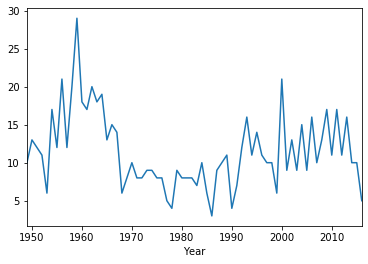

In [6]:
#para ver la evolución del # de muertos
%matplotlib inline
sharks[sharks["Fatal (Y/N)"]=="Y"].groupby(["Year"]).count()["Fatal (Y/N)"].plot()

En el  gráfico podemos ver la evolución anual del número de muertes por ataque de tiburón. Vemos que tuvo una tendencia negativa hasta la mitad de la década de los 80's, cuándo cambia esta tendencia y se invierte y vuelve a alcanzar valores.

In [7]:
n_df=pd.DataFrame()
n_df['Dead']=sharks[sharks["Fatal (Y/N)"]=="Y"].groupby(["Year"]).count()["Fatal (Y/N)"]
n_df['Not Dead']=sharks[sharks["Fatal (Y/N)"]=="N"].groupby(["Year"]).count()["Fatal (Y/N)"]
n_df['No info']=sharks[(sharks["Fatal (Y/N)"]=="UNKNOWN")].groupby(["Year"]).count()["Fatal (Y/N)"]
n_df['No info'].fillna(0,inplace=True)
n_df.head()

,Dead,Not Dead,No info
Year,,,
1949,10,19,2.0
1950,13,30,0.0
1951,12,19,0.0
1952,11,18,0.0
1953,6,30,0.0


In [8]:
n_df['% Dead']=(n_df['Dead']/(n_df['Not Dead']+n_df['No info']+n_df['Dead'])*100)
display(n_df.head())
display(n_df.describe())

,Dead,Not Dead,No info,% Dead
Year,,,,
1949,10,19,2.0,32.258065
1950,13,30,0.0,30.232558
1951,12,19,0.0,38.709677
1952,11,18,0.0,37.931034
1953,6,30,0.0,16.666667


,Dead,Not Dead,No info,% Dead
count,67.000000,67.000000,67.000000,67.000000
mean,11.552239,51.373134,0.835821,20.595704
std,4.896763,29.852078,1.009005,9.013089
min,3.000000,16.000000,0.000000,4.854369
25%,8.000000,30.000000,0.000000,14.083333
50%,10.000000,40.000000,1.000000,19.354839
75%,14.500000,75.000000,1.000000,26.884523
max,29.000000,129.000000,4.000000,41.176471



De los datos que se observan en la tabla anterior, podemos sacar los siguientes datos:
        En la serie analizada, hay una media de **62,8 ataques al año**, con una media de un **20,59% de tasa de fatalidad**.
        
         

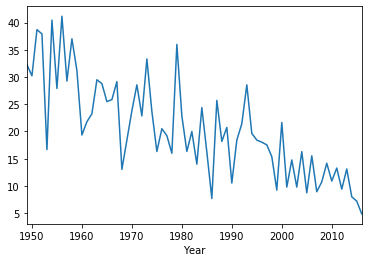

In [9]:
#para ver la evolución la tasa de fatalidad
%matplotlib inline
n_df["% Dead"].plot()

Podemos ver que con el paso de los años **la tasa de fatalidad de los ataques de tiburón** ha disminuido 
desde un **40% en los años 1950** hasta encontrarese la tasa entorno a un **10% durante la primera década de los 2000.**

In [ ]:
x=sharks[sharks["Fatal (Y/N)"]=="Y"].groupby(["Year"]).count()["Fatal (Y/N)"]
y=movie_sharks.groupby('Year').sum()['Movies']

In [12]:
x.loc[1969] = 0

In [18]:
x.sort_index(axis=0, inplace=True)

Añado el valor de 1969, puesto que no hubo muertes ese año, por lo que no aparecía este año y reordeno el dataframe para que el registro esté en el índice que le corresponde.

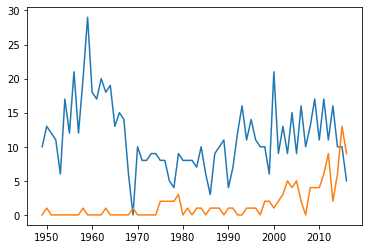

In [20]:
plt.plot(x, label = 'Deaths')
plt.plot(movie_sharks.groupby('Year').sum()['Movies'], label = 'Movies')

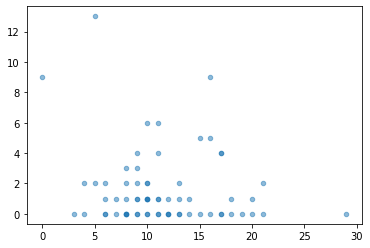

In [15]:
plt.scatter(x, y, s=20, alpha=0.5)

No se ve relación entre el número de películas y el número de muertes.